In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
cols_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None,names=col_names)

In [28]:
pima =pima.drop([0])

In [29]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [43]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [44]:
X = pima[feature_cols]
Y = pima.label

In [45]:
#split data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [46]:
#create decision tree classifer object
clf = DecisionTreeClassifier()

#Train 
clf  = clf.fit(X_train,y_train)
#predict the response
y_pred = clf.predict(X_test)

In [47]:
print("Acurracy",metrics.accuracy_score(y_test,y_pred))

Acurracy 0.6796536796536796


# Visualize **tree**

In [48]:
!pip install graphviz
!pip install pydotplus

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [51]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols,
                class_names=['0','1'])
graph =pydotplus.graph_from_dot_data(dot_data.getvalue())


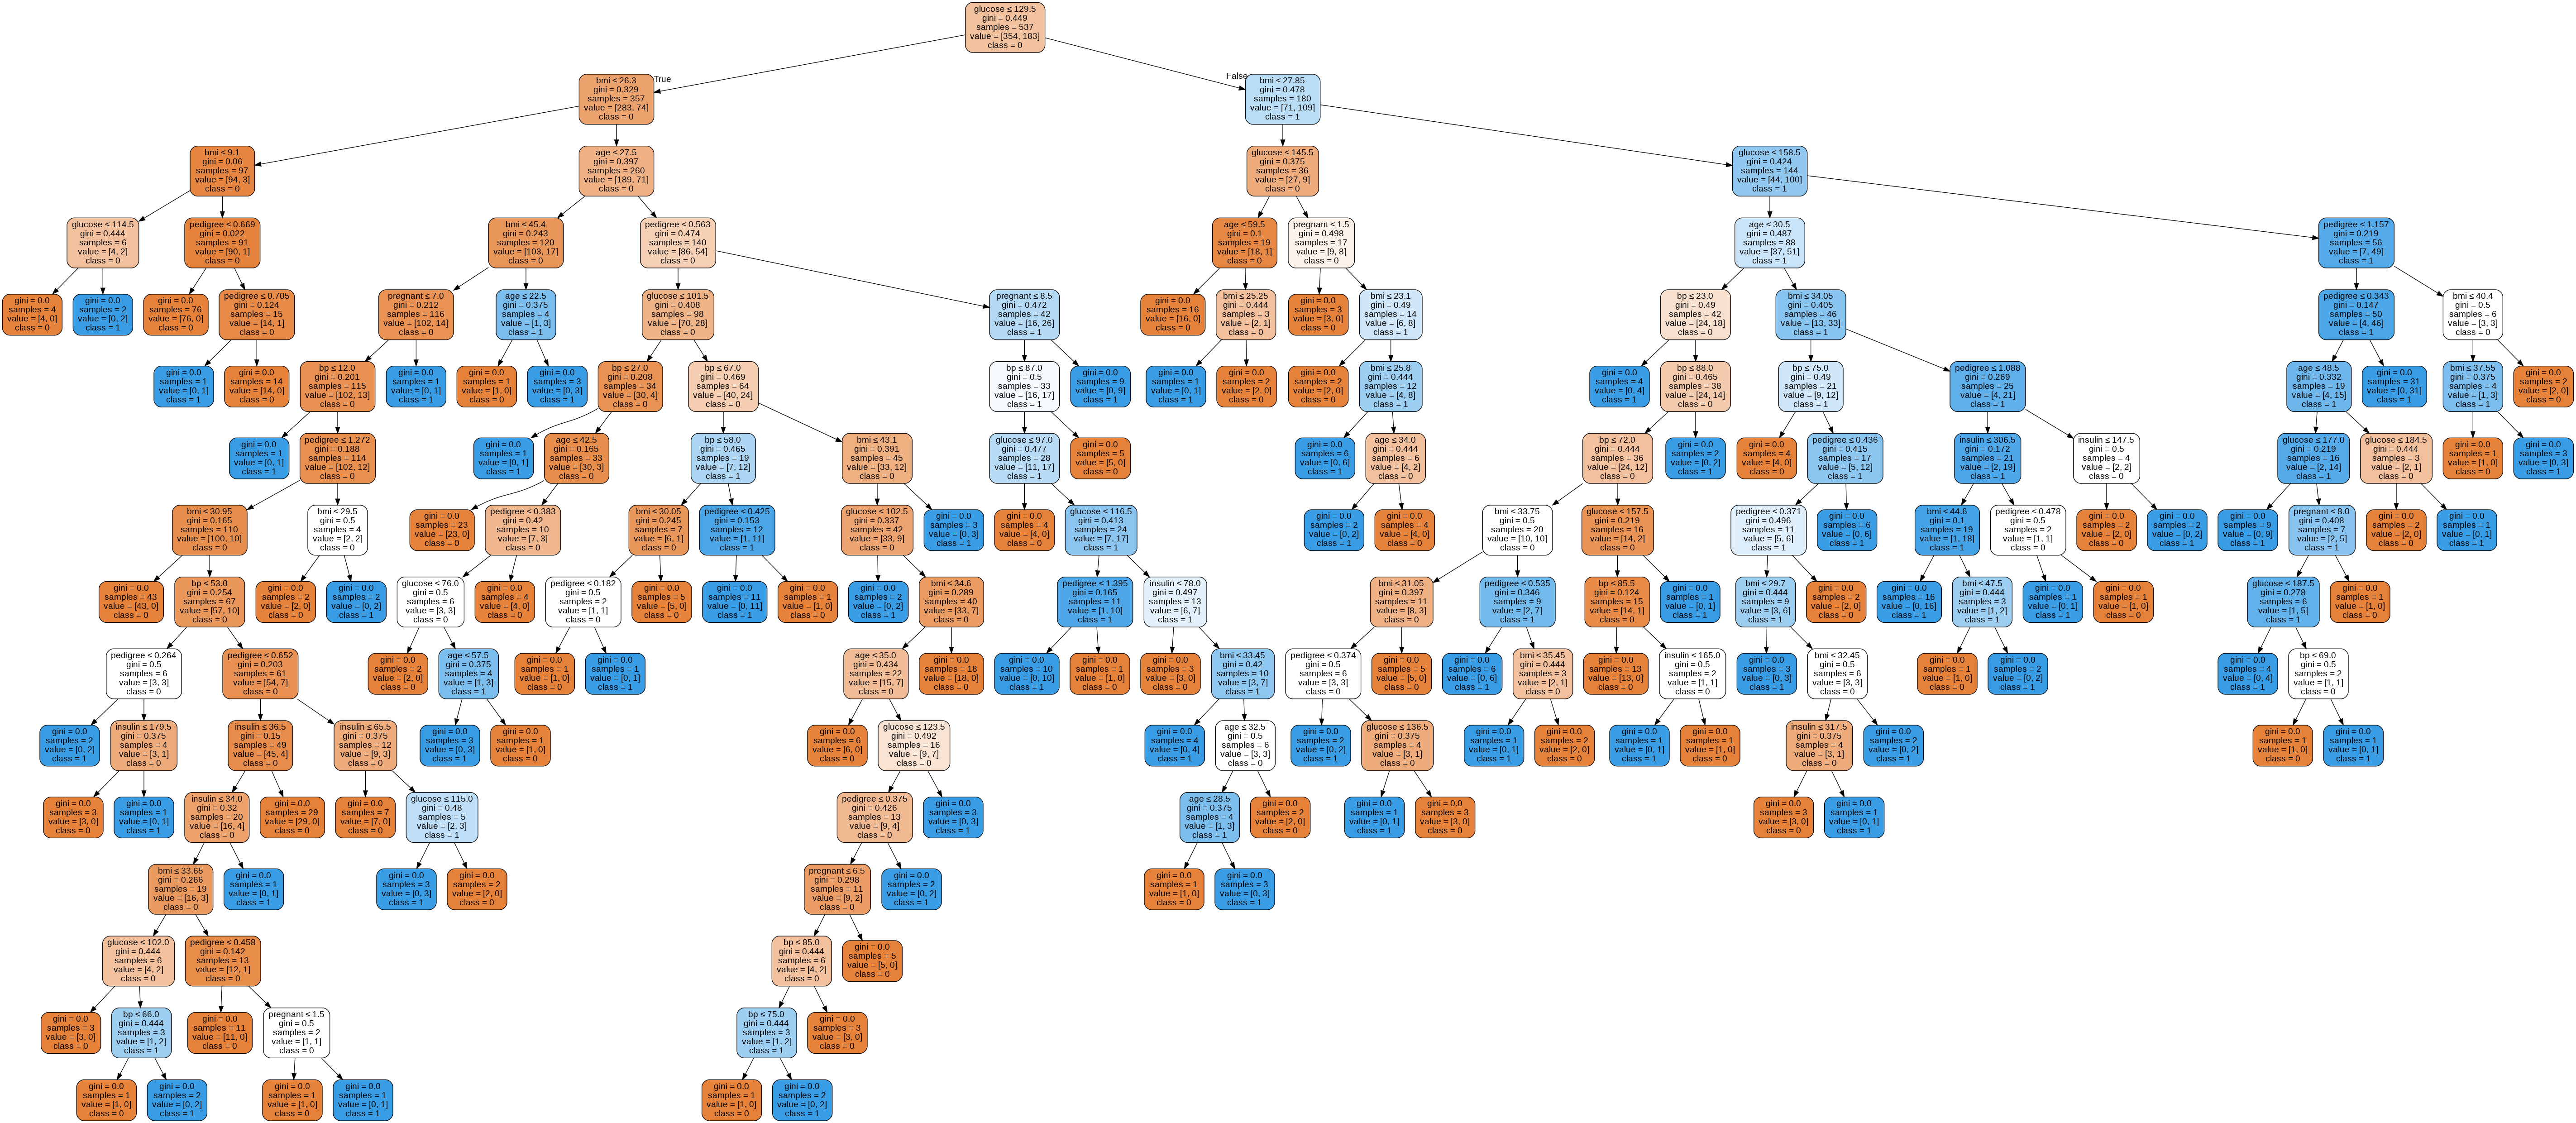

In [52]:
graph.write_png('diabetes.png')
Image(graph.create_png())

# Optimizing Decision Tree Performance
1. criterion : optional (default=”gini”) or Choose 
attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

2.  splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

3.  max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [53]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

#train
clf =clf.fit(X_train,y_train)

#pred
y_pred = clf.predict(X_test)

print("Acurracy",metrics.accuracy_score(y_test,y_pred))

Acurracy 0.7705627705627706


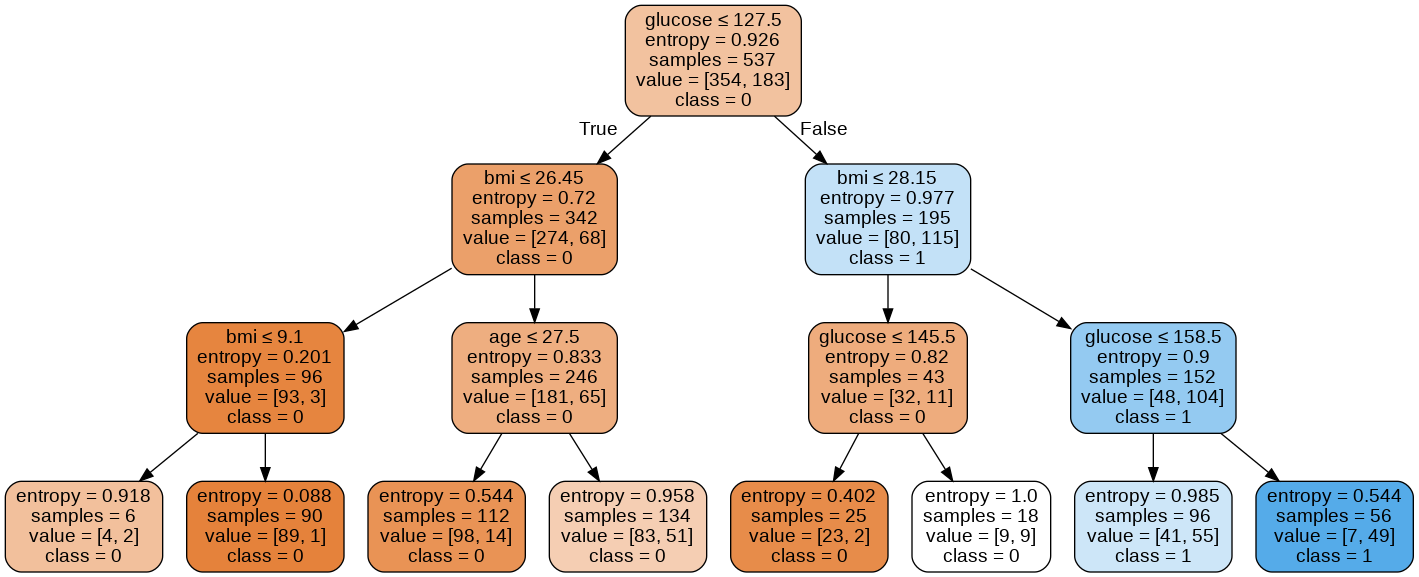

In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## References
https://www.datacamp.com/community/tutorials/decision-tree-classification-python